In order to get some datasets I needed to export them by convertind the dataframe to a csv and then outputting the contents of the file to the terminal such as the example below.
```Python
# output the contents of the dataframe to CSV wile also removing the index for pushing it to a dataframe.
wards_altered.to_csv("wards_altered.csv", index=False)

# open the file and read the contents of the file to the terminal.
with open("wards_altered.csv", "r") as f:
    print(f.read())
```

# Uniformity

In [43]:
# import packages
import pandas as pd

# import data
banking = pd.read_csv("../datasets/banking.csv")
banking.head()

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.85,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.33,dollar,46412.27,26-01-18,06-10-19
3,93F2F951,93875.24,euro,76563.35,21-08-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19


### Uniform currencies

In [44]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique().any() == 'dollar'

### Uniform dates

In [45]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking.acct_year)

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
94    2018
95    2017
96    2017
97     NaN
98     NaN
Name: acct_year, Length: 99, dtype: object


# Cross Field Validation

### How's our data integrity?

In [46]:
# import packages
import datetime as dt

# import data
banking = pd.read_csv("../datasets/banking_dirty.csv")
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [47]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')
banking.rename(columns={'Age': 'age'}, inplace=True)

In [48]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking.age == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


# Completeness

### Missing investors

In [50]:
# install needed packages using pip
import sys
!{sys.executable} -m pip install missingno

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [49]:
# imoprt packages
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

Unnamed: 0          0
cust_id             0
birth_date          0
age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


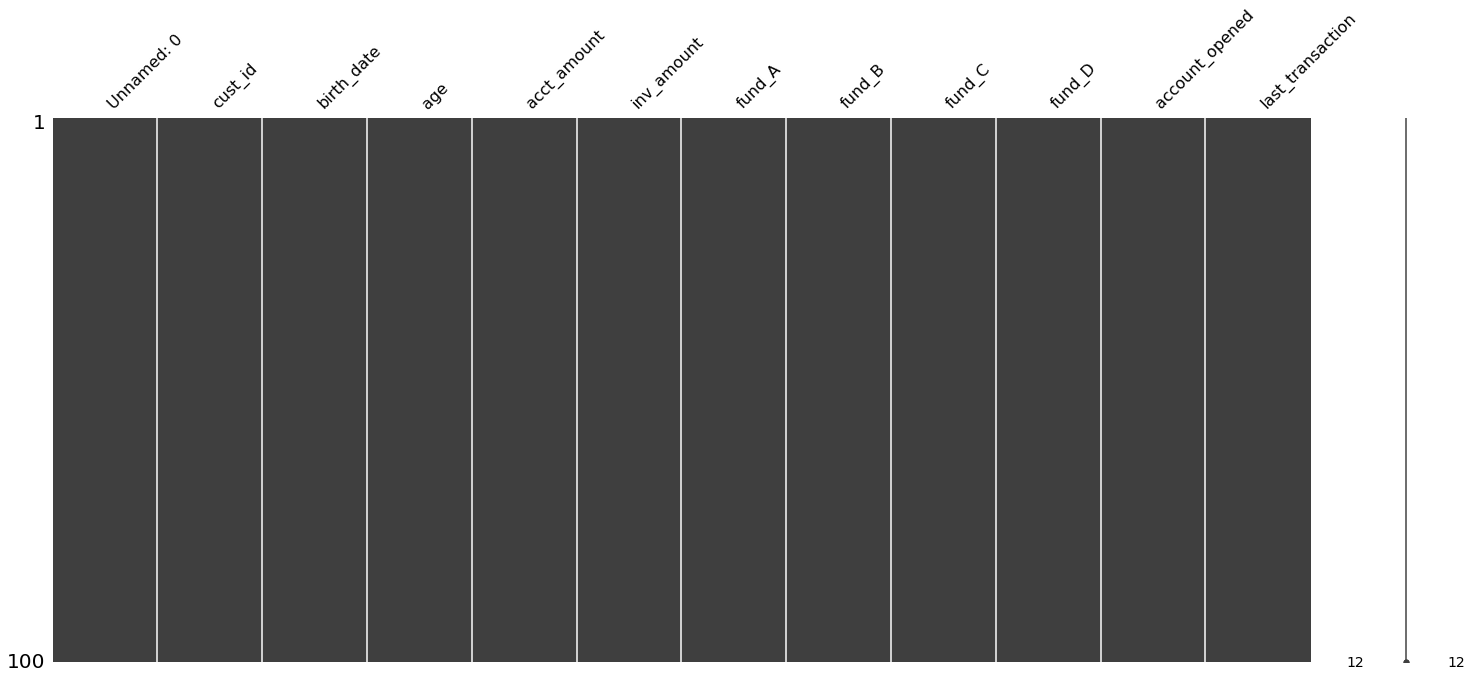

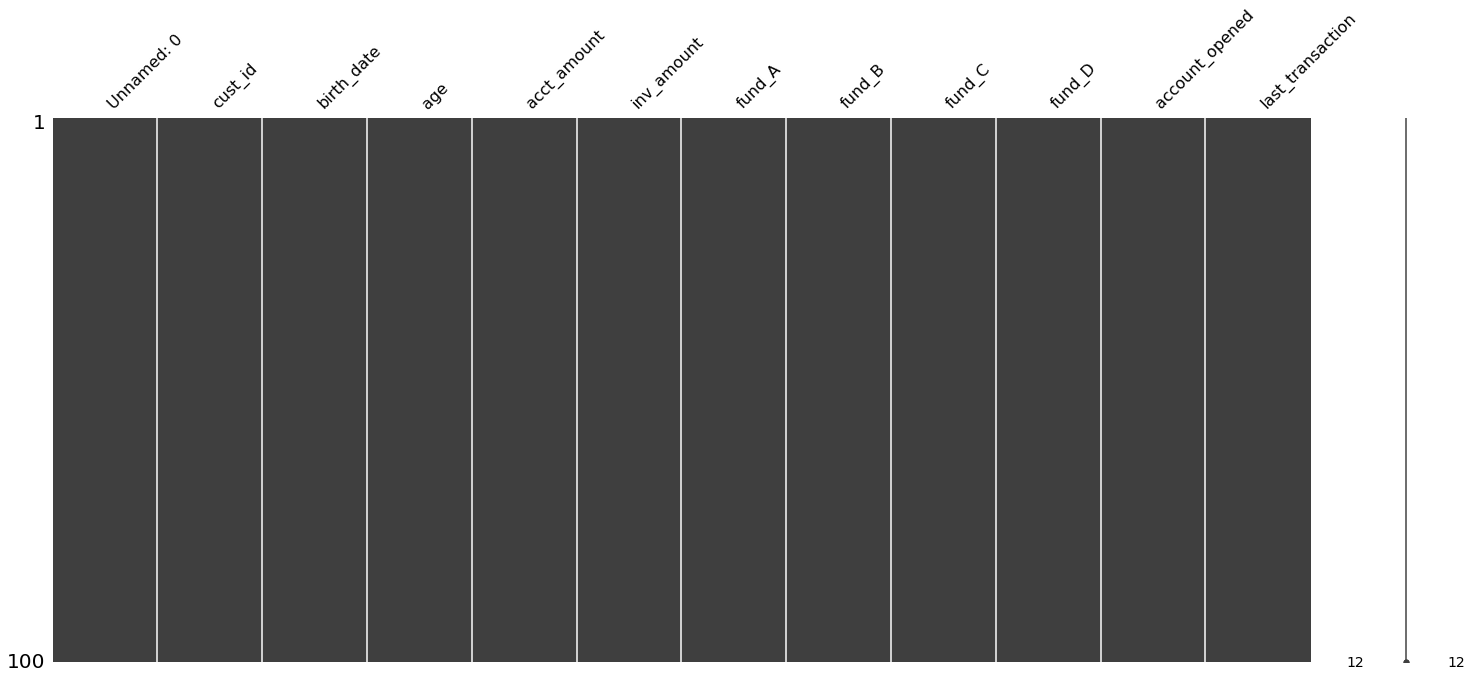

In [40]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values('age', ascending=True)
msno.matrix(banking_sorted)
plt.show()

### Follow the money

In [41]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64
